# UniqueShortestPaths

In [17]:
#libraries needed
from graphviz import Digraph
from random import randint
import copy

In [18]:
#my own dijkstra's, returns multiple shortest paths
def wijkstra(graph, source, destination):
    paths = []
    current = source
    vertices = {vertex for vertex in graph.keys()}
    distances = {vertex: float("inf") for vertex in vertices}
    previous = {vertex: None for vertex in vertices}
    distances[source] = 0
    #print(distances)
    
    while len(vertices) > 0:
        #make a temp set with only vertices still in vertices
        temp_dists = {i: distances[i] for i in distances.keys() if i in vertices}
        current = min(temp_dists, key=temp_dists.get)
        vertices.remove(current)
    
        for neighbour in graph[current].items():
            alt = distances[current] + neighbour[1]
            if alt <= distances[neighbour[0]]:
                distances[neighbour[0]] = alt
                previous[neighbour[0]] = current
                #if the end node has a value, store that path
                if distances[destination] != float("inf"):
                    temp_prev = copy.deepcopy(previous)
                    paths.append(temp_prev)
    return (distances, previous, paths, distances[destination])

### Graph Initialization

Enter Upper Bound (m): 1

Randomised graph: {'S': {'E': 1, 'G': 0}, 'E': {'W': 0, 'J': 1}, 'G': {'J': 0}, 'W': {'K': 0, 'T': 1}, 'J': {'K': 1}, 'K': {'T': 1}, 'T': {}}

m value: 1


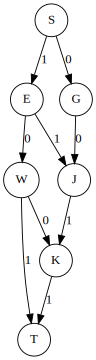

In [31]:
#RANDOMIZE GRAPH
#TAKE IN SOURCE AND DESTINATION FROM USER
#graph inputted to dijkstra's algorithm
start = 'S'
end = 'T'
#m value upper bound of arc weights
m = int(input('Enter Upper Bound (m): '))
graph = {'S': {'E': 3, 'G': 2},
         'E': {'W': 4, 'J': 6},
         'G': {'J': 3},
         'W': {'K': 1, 'T': 2},
         'J': {'K': 5},
         'K': {'T': 1},
         'T': {}}

#randomization of arcs
for key in graph.keys():
    for sub_key in graph[key].keys():
        graph[key][sub_key] = randint(0, m)
print(f"\nRandomised graph: {graph}\n\nm value: {m}")

nodes = tuple([i for i in graph.keys()])

#creating graph
g = Digraph('UsersDigraph', filename='UsersDigraph.gv')
g.attr(size='8,5')
g.attr('node', shape='circle')
#loop through keys to get all nodes
for node in graph.keys():
    g.node(node)
#nested loop to create all edges
for node, connections in graph.items():
    for con_node, arc_length in connections.items():
        g.edge(node, con_node, label=str(arc_length))
#showing graph
g

### Dijkstra's

In [32]:
solved = wijkstra(graph, start, end)
print(f"Shortest Distances to each vertex: {solved[0]}")
print(f"\nAll possible shortest paths: {solved[2]}")
print(f"\nShortest Distance: {solved[3]}")

Shortest Distances to each vertex: {'W': 1, 'S': 0, 'J': 0, 'G': 0, 'T': 2, 'E': 1, 'K': 1}

All possible shortest paths: [{'W': 'E', 'S': None, 'J': 'G', 'G': 'S', 'T': 'W', 'E': 'S', 'K': 'W'}, {'W': 'E', 'S': None, 'J': 'G', 'G': 'S', 'T': 'K', 'E': 'S', 'K': 'W'}]

Shortest Distance: 2


### Visualization

In [33]:
#use 'previous' dict to determine shortest path
shortest_paths = []
for previous in solved[2]:
    source, target = 'S', 'T'
    path = [target]
    current = target
    while current != source:
        #loop back through dictionary
        current = previous[current]
        path.insert(0, current)
    shortest_paths.append(path)
    print(f"Shortest Path: {path} with length: {solved[0][target]}")

#getting tuples of edges in shortest path
graph_num = 1
for path in shortest_paths:
    shortest_path = []
    for i in range(len(path)):
        if i < len(path)-1:
            shortest_path.append(tuple(path[i:i+2]))
    #creating graph
    g = Digraph('UsersDigraph', filename='UsersDigraph.gv')
    g.attr(size='8,5')
    g.attr('node', shape='circle')
    #loop through keys to get all nodes
    for node in graph.keys():
        g.node(node)
    #nested loop to create all edges
    for node, connections in graph.items():
        for con_node, arc_length in connections.items():
            if (node, con_node) in shortest_path:
                g.edge(node, con_node, label=str(arc_length), color='red')
            else:
                g.edge(node, con_node, label=str(arc_length))
    #showing graph
    g.render(f"shortest_path{graph_num}", 'path_graphics')
    graph_num += 1

Shortest Path: ['S', 'E', 'W', 'T'] with length: 2
Shortest Path: ['S', 'E', 'W', 'K', 'T'] with length: 2


### Ta-Shma's Estimation using isolation lemma

In [34]:
arcs = sum([len(i.keys()) for i in graph.values()])
print(f"Ta Shma's Probability Estimation that this given smallest path is unique: {round(1 - (1/m)**arcs, 2)*100}%")

Ta Shma's Probability Estimation that this given smallest path is unique: 0.0%
